# Notebook Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Notebook Constants

In [2]:
TOKEN_SPAM_PROB_FILE = 'SpamData/03_Testing/prob-spam.txt'
TOKEN_HAM_PROB_FILE = 'SpamData/03_Testing/prob-nonspam.txt'
TOKEN_ALL_PROB_FILE = 'SpamData/03_Testing/prob-all-tokens.txt'

TEST_FEATURE_MATRIX = 'SpamData/03_Testing/test-features.txt'
TEST_TARGET_FILE = 'SpamData/03_Testing/test-target.txt'

VOCAB_SIZE = 2500

# Load Data

In [3]:
X_test = np.loadtxt(TEST_FEATURE_MATRIX, delimiter=' ')
y_test = np.loadtxt(TEST_TARGET_FILE, delimiter=' ')

prob_token_spam = np.loadtxt(TOKEN_SPAM_PROB_FILE, delimiter=' ')
prob_token_ham = np.loadtxt(TOKEN_HAM_PROB_FILE, delimiter=' ')
prob_token_all = np.loadtxt(TOKEN_ALL_PROB_FILE, delimiter=' ')

In [4]:
X_test[:5]

array([[0., 0., 1., ..., 0., 0., 0.],
       [6., 1., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 2., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

# Calculating the Joint Probability

### The Dot Product

In [5]:
a = np.array([1, 2, 3])
b= np.array([4, 5, 6])

a.dot(b)

32

In [6]:
c = np.array([[1, 2],
             [3, 4],
             [6, 7]])
a.dot(c)

array([25, 31])

In [7]:
X_test.shape

(1724, 2500)

In [8]:
prob_token_spam.shape

(2500,)

In [9]:
print(f'shape of the dot product is: {X_test.dot(prob_token_spam).shape}')

shape of the dot product is: (1724,)


## Set the prior

$$ P(Spam\, |\, X) = \frac{P(X|\, Spam) \, P(Spam) }{P(X)}$$

In [10]:
PROB_SPAM = 0.3116

In [11]:
np.log(prob_token_spam)

array([ -4.40759195,  -5.25366675,  -4.99006919, ...,  -9.26099994,
        -9.38616308, -11.4010661 ])

## Joint probability in log format

In [12]:
joint_log_spam = X_test.dot( np.log(prob_token_spam) - np.log(prob_token_all) ) + np.log(PROB_SPAM)

In [13]:
joint_log_spam[:5]

array([24.28360787,  2.16305488, 20.59344354, 17.75865473, 20.51721085])

$$ P(Ham\, |\, X) = \frac{P(X|\, Ham) \, P(Ham) }{P(X)}$$

In [14]:
joint_log_ham = X_test.dot( np.log(prob_token_ham) - np.log(prob_token_all) ) + np.log(1 - PROB_SPAM)

In [15]:
joint_log_ham[:5]

array([-60.9732416 , -11.01142777, -37.96955526, -59.13793992,
       -53.80718869])

In [16]:
joint_log_ham.size

1724

In [17]:
joint_log_spam.size

1724

# Making Prediction

## checking for the higher joint probability

$$ P(Spam\,|\,X) > P(Ham\,|\,X) $$
</br>
<center>**OR**</center>
</br>
$$ P(Spam\,|\,X) < P(Ham\,|\,X) $$

In [18]:
prediction = joint_log_spam > joint_log_ham
prediction

array([ True,  True,  True, ..., False, False, False])

In [19]:
prediction[:5]*1

array([1, 1, 1, 1, 1])

In [20]:
y_test[-5:]

array([0., 0., 0., 0., 0.])

### simplify

$$ P(X|\, Ham) \, P(Ham)  \neq \frac{P(X|\, Ham) \, P(Ham) }{P(X)}$$

In [21]:
joint_log_spam = X_test.dot( np.log(prob_token_spam)) + np.log(PROB_SPAM)
joint_log_ham = X_test.dot( np.log(prob_token_ham)) + np.log(1 - PROB_SPAM)

# Metrics and Evaluation

## Accuracy

In [22]:
correct_docs = (y_test == prediction).sum()
print('Docs classified correctly', correct_docs)
numdocs_wrong = X_test.shape[0] - correct_docs
print('Docs classified incorrectly', numdocs_wrong)

Docs classified correctly 1685
Docs classified incorrectly 39


In [23]:
# Accuracy
correct_docs / len(y_test)

0.9773781902552204

In [24]:
frac_wrong = numdocs_wrong / len(y_test)

print(f'Fraction classified incorrectly is: {1-frac_wrong:.2%}')
print(f'Accuracy of the model is: {frac_wrong:.2%}')

Fraction classified incorrectly is: 97.74%
Accuracy of the model is: 2.26%


## Visualising the Results

In [25]:
y_label = 'P(X|Spam)'
x_label = 'P(X|Nonspam)'

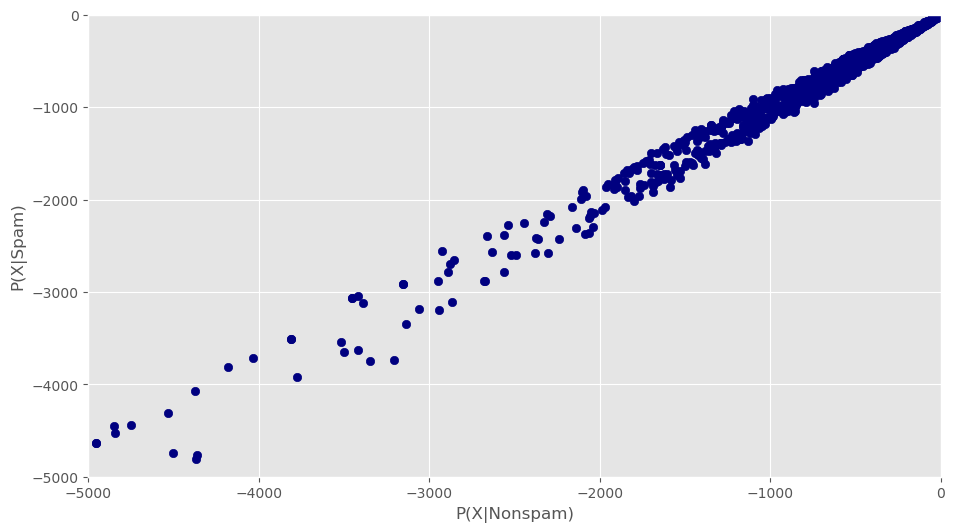

In [26]:
plt.style.use('ggplot')
plt.figure(figsize=(11,6))
plt.xlabel(x_label, fontsize=12)
plt.ylabel(y_label, fontsize=12)
plt.xlim([-5000, 1])
plt.ylim([-5000, 1])
plt.scatter(joint_log_ham, joint_log_spam, color='navy')
plt.show()

## The Decision Boundary

In [27]:
linedata = np.linspace(start=-5000, stop=1, num=1000)

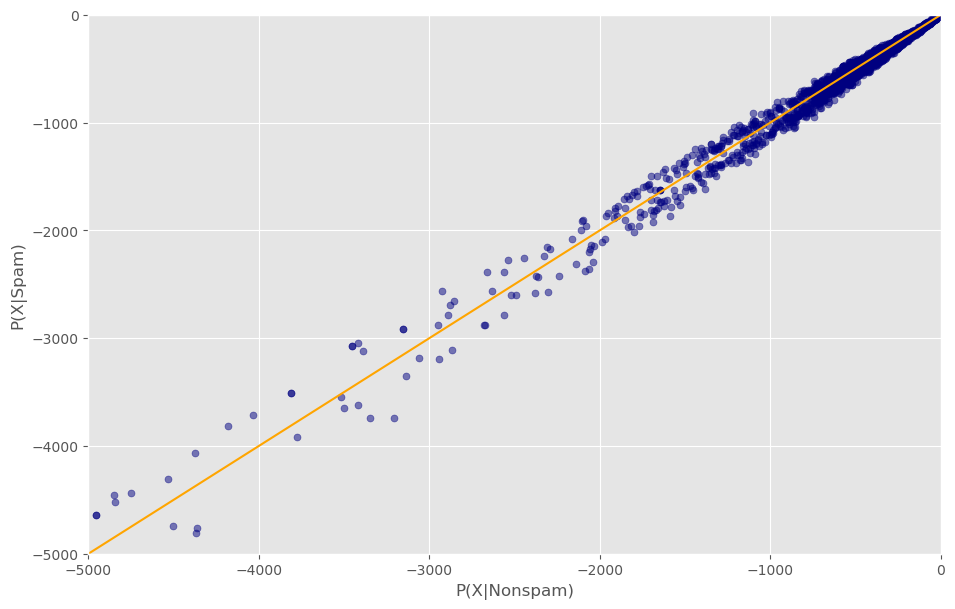

In [28]:
plt.style.use('ggplot')
plt.figure(figsize=(11,7))
plt.xlabel(x_label, fontsize=12)
plt.ylabel(y_label, fontsize=12)
plt.xlim([-5000, 1])
plt.ylim([-5000, 1])
plt.scatter(joint_log_ham, joint_log_spam, color='navy', alpha=0.5, s=25)
plt.plot(linedata, linedata, color = 'orange')
plt.show()

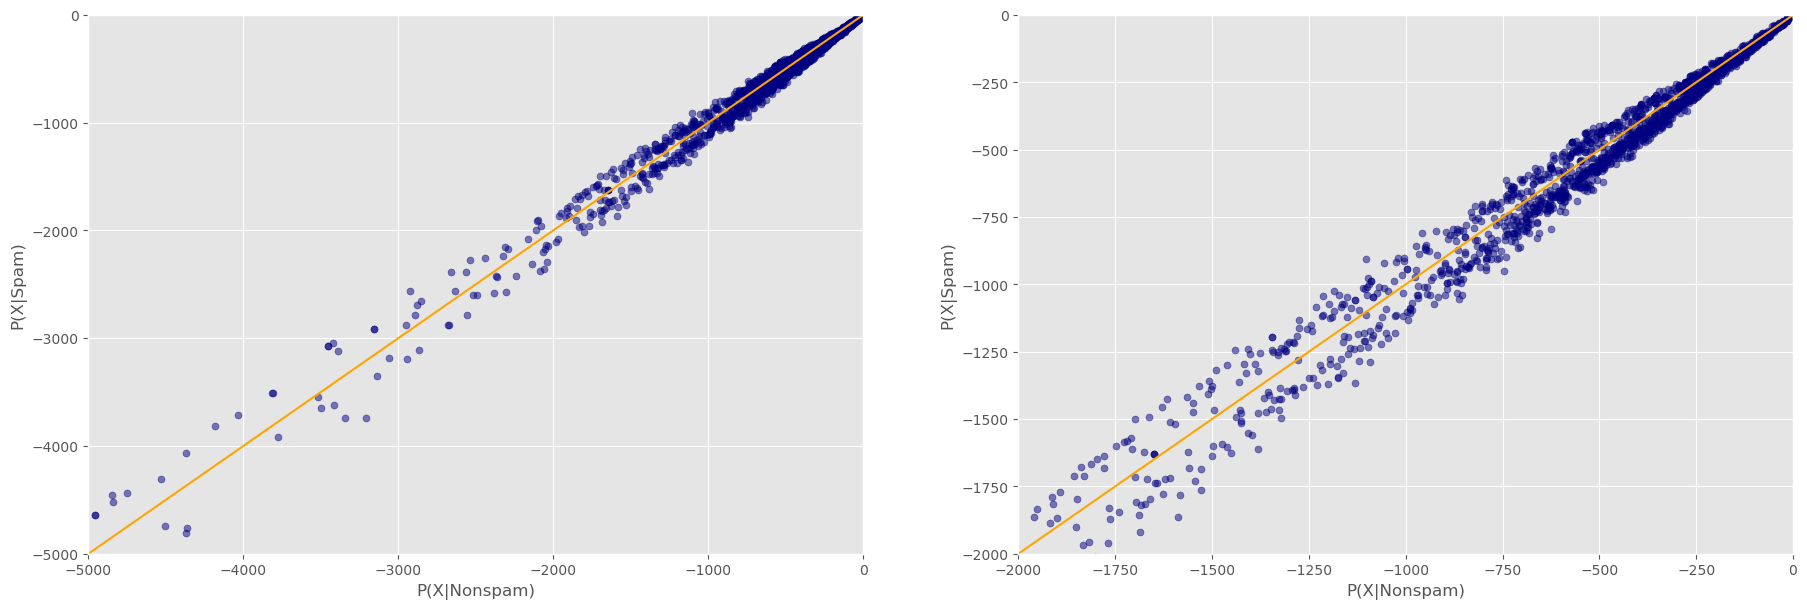

In [29]:
plt.style.use('ggplot')
plt.figure(figsize=(22,7))

plt.subplot(1, 2, 1)

plt.xlabel(x_label, fontsize=12)
plt.ylabel(y_label, fontsize=12)
plt.xlim([-5000, 1])
plt.ylim([-5000, 1])
plt.scatter(joint_log_ham, joint_log_spam, color='navy', alpha=0.5, s=25)
plt.plot(linedata, linedata, color = 'orange')

plt.subplot(1, 2, 2)

plt.xlabel(x_label, fontsize=12)
plt.ylabel(y_label, fontsize=12)
plt.xlim([-2000, 1])
plt.ylim([-2000, 1])
plt.scatter(joint_log_ham, joint_log_spam, color='navy', alpha=0.5, s=25)
plt.plot(linedata, linedata, color = 'orange')



plt.show()

In [34]:
labels = 'Category'
yaxis_label = 'P(X | Spam)'
xaxis_label = 'P(X | Nonspam)'

summary_df = pd.DataFrame({yaxis_label: joint_log_spam, xaxis_label: joint_log_ham,
                          labels: y_test} )

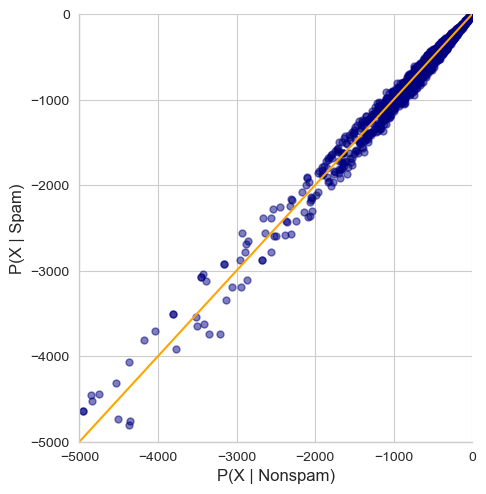

In [47]:
sns.set_style('whitegrid')
sns.lmplot(x=xaxis_label, y=yaxis_label, data=summary_df, scatter_kws={'color':'navy', 'alpha':0.5, 's':25}, fit_reg=False)
plt.plot(linedata, linedata, color = 'orange')
plt.xlim([-5000, 1])
plt.ylim([-5000, 1])
plt.show()

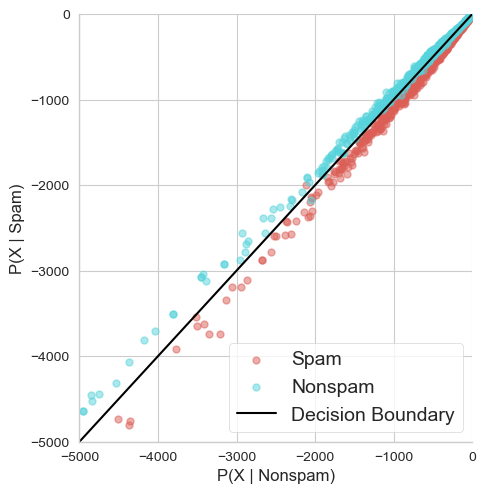

In [54]:
sns.set_style('whitegrid')
sns.lmplot(x=xaxis_label, y=yaxis_label, data=summary_df, scatter_kws={'alpha':0.5, 's':25}, fit_reg=False, 
          hue=labels, legend=False, palette='hls')
plt.plot(linedata, linedata, color = 'black')
plt.xlim([-5000, 1])
plt.ylim([-5000, 1])
plt.legend(('Spam', 'Nonspam', 'Decision Boundary'), loc='lower right', fontsize=14)
plt.show()

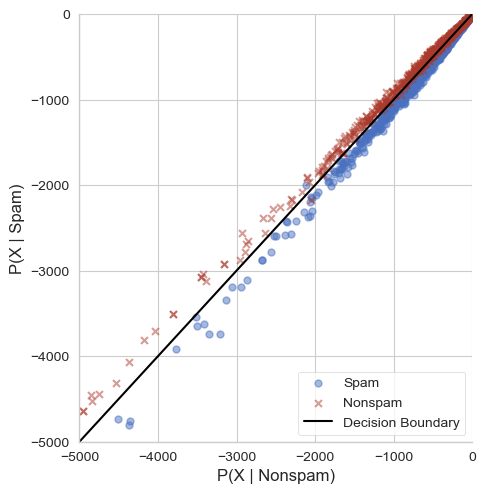

In [57]:
my_colours = ['#4A71C0', '#AB3A2C']

sns.set_style('whitegrid')
sns.lmplot(x=xaxis_label, y=yaxis_label, data=summary_df, scatter_kws={'alpha':0.5, 's':25}, fit_reg=False, 
          hue=labels, legend=False, palette=my_colours, markers=['o', 'x'])
plt.plot(linedata, linedata, color = 'black')
plt.xlim([-5000, 1])
plt.ylim([-5000, 1])
plt.legend(('Spam', 'Nonspam', 'Decision Boundary'), loc='lower right', fontsize=10)
plt.show()

### False Positives and False Negatives

In [58]:
np.unique(prediction, return_counts=True)

(array([False,  True]), array([1136,  588], dtype=int64))

In [61]:
true_pos = (y_test == 1) & (prediction == 1)
true_pos.sum()

569

In [62]:
false_pos = (y_test == 0) & (prediction == 1)
false_pos.sum()

19

In [63]:
false_neg = (y_test == 1) & (prediction == 0)
false_neg.sum()

20

## Recall Score

In [71]:
recall_score = ( true_pos.sum() ) / ( true_pos.sum() + false_neg.sum() )
print(f'Recall score is {recall_score:0.2%}')


Recall score is 96.60%


## Precision Score

In [72]:
precision_Score = ( true_pos.sum() ) / ( true_pos.sum() + false_pos.sum() )
print(f'Precision score is {precision_Score:0.2%}')

Precision score is 96.77%


## F-Score or F1 Score

In [73]:
f1_score = 2*recall_score*precision_Score / (recall_score + precision_Score)
print(f'F Score is {f1_score:.2f}')

F Score is 0.97
